## Type of missing value
-Missing Completely at Random (MCAR) - Implies the missingness of a  field is completely random, and that we probably cannot predict that value from any other value in the data.

-Missing at Random (MAR) - Implies that the missingness of a field can be explained by the values in other columns, but not from that column.

-Missing NOT at Random (MNAR) - Implies whether there was a reason why the respondent didn’t fill up that field, and hence that data is not missing at random. For example, if someone is obese, they are less likely to disclose their weight.

MICE stands for Multivariate Imputation By Chained Equations algorithm, a technique by which we can effortlessly impute missing values in a dataset by looking at data from other columns and trying to estimate the best prediction for each missing value.

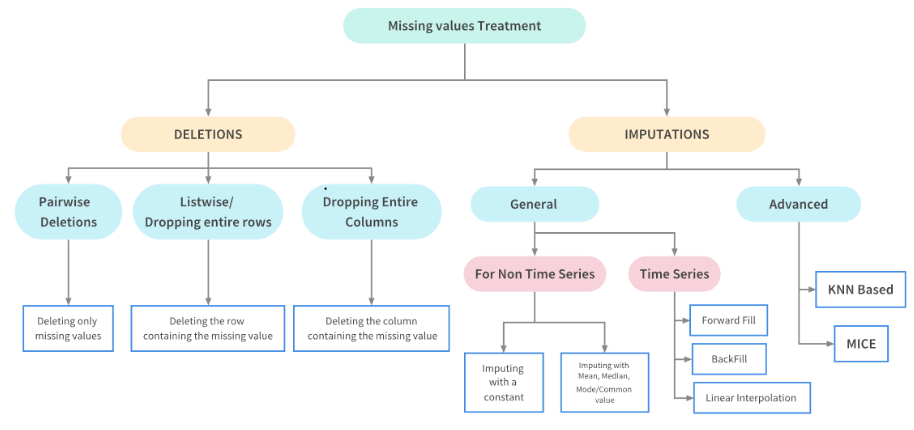

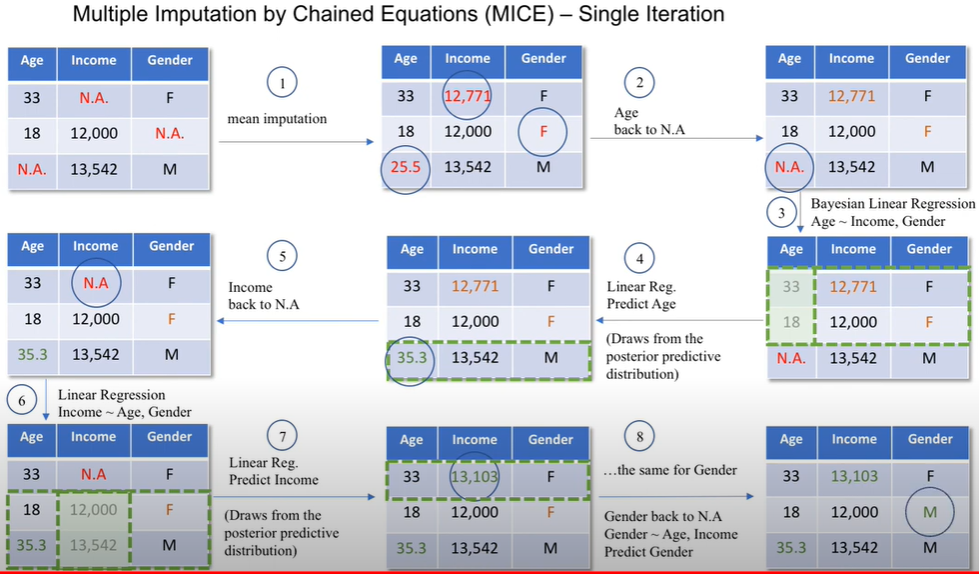

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
import seaborn as sns
plt.style.use("fivethirtyeight")

In [5]:
df = pd.read_csv('travel_times.csv', parse_dates=[['Date', 'StartTime']], index_col='Date_StartTime')
     

In [6]:
df.head()


,x,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
Date_StartTime,,,,,,,,,,,,
2012-01-06 16:37:00,1,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
2012-01-06 08:20:00,2,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2012-01-04 16:17:00,3,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
2012-01-04 07:53:00,4,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
2012-01-03 18:57:00,5,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2012-01-06 16:37:00 to 2011-07-11 16:56:00
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               205 non-null    int64  
 1   DayOfWeek       205 non-null    object 
 2   GoingTo         205 non-null    object 
 3   Distance        205 non-null    float64
 4   MaxSpeed        205 non-null    float64
 5   AvgSpeed        205 non-null    float64
 6   AvgMovingSpeed  205 non-null    float64
 7   FuelEconomy     188 non-null    object 
 8   TotalTime       205 non-null    float64
 9   MovingTime      205 non-null    float64
 10  Take407All      205 non-null    object 
 11  Comments        24 non-null     object 
dtypes: float64(6), int64(1), object(5)
memory usage: 20.8+ KB


In [8]:
df.describe()


,x,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,50.981512,127.591707,74.477561,81.975610,41.904390,37.871707
std,59.322565,1.321205,4.128450,11.409816,10.111544,6.849476,4.835072
min,1.000000,48.320000,112.200000,38.100000,50.300000,28.200000,27.100000
25%,52.000000,50.650000,124.900000,68.900000,76.600000,38.400000,35.700000
50%,103.000000,51.140000,127.400000,73.600000,81.400000,41.300000,37.600000
75%,154.000000,51.630000,129.800000,79.900000,86.000000,44.400000,39.900000
max,205.000000,60.320000,140.900000,107.700000,112.100000,82.300000,62.400000


In [9]:
mask = np.random.choice([True, False], size=df['MaxSpeed'].shape, p=[0.1, 0.9])
mask[mask.all(),-1] = 0
df['MaxSpeed'] = df['MaxSpeed'].mask(mask)

In [10]:
df.isnull().sum()


x                   0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed           22
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

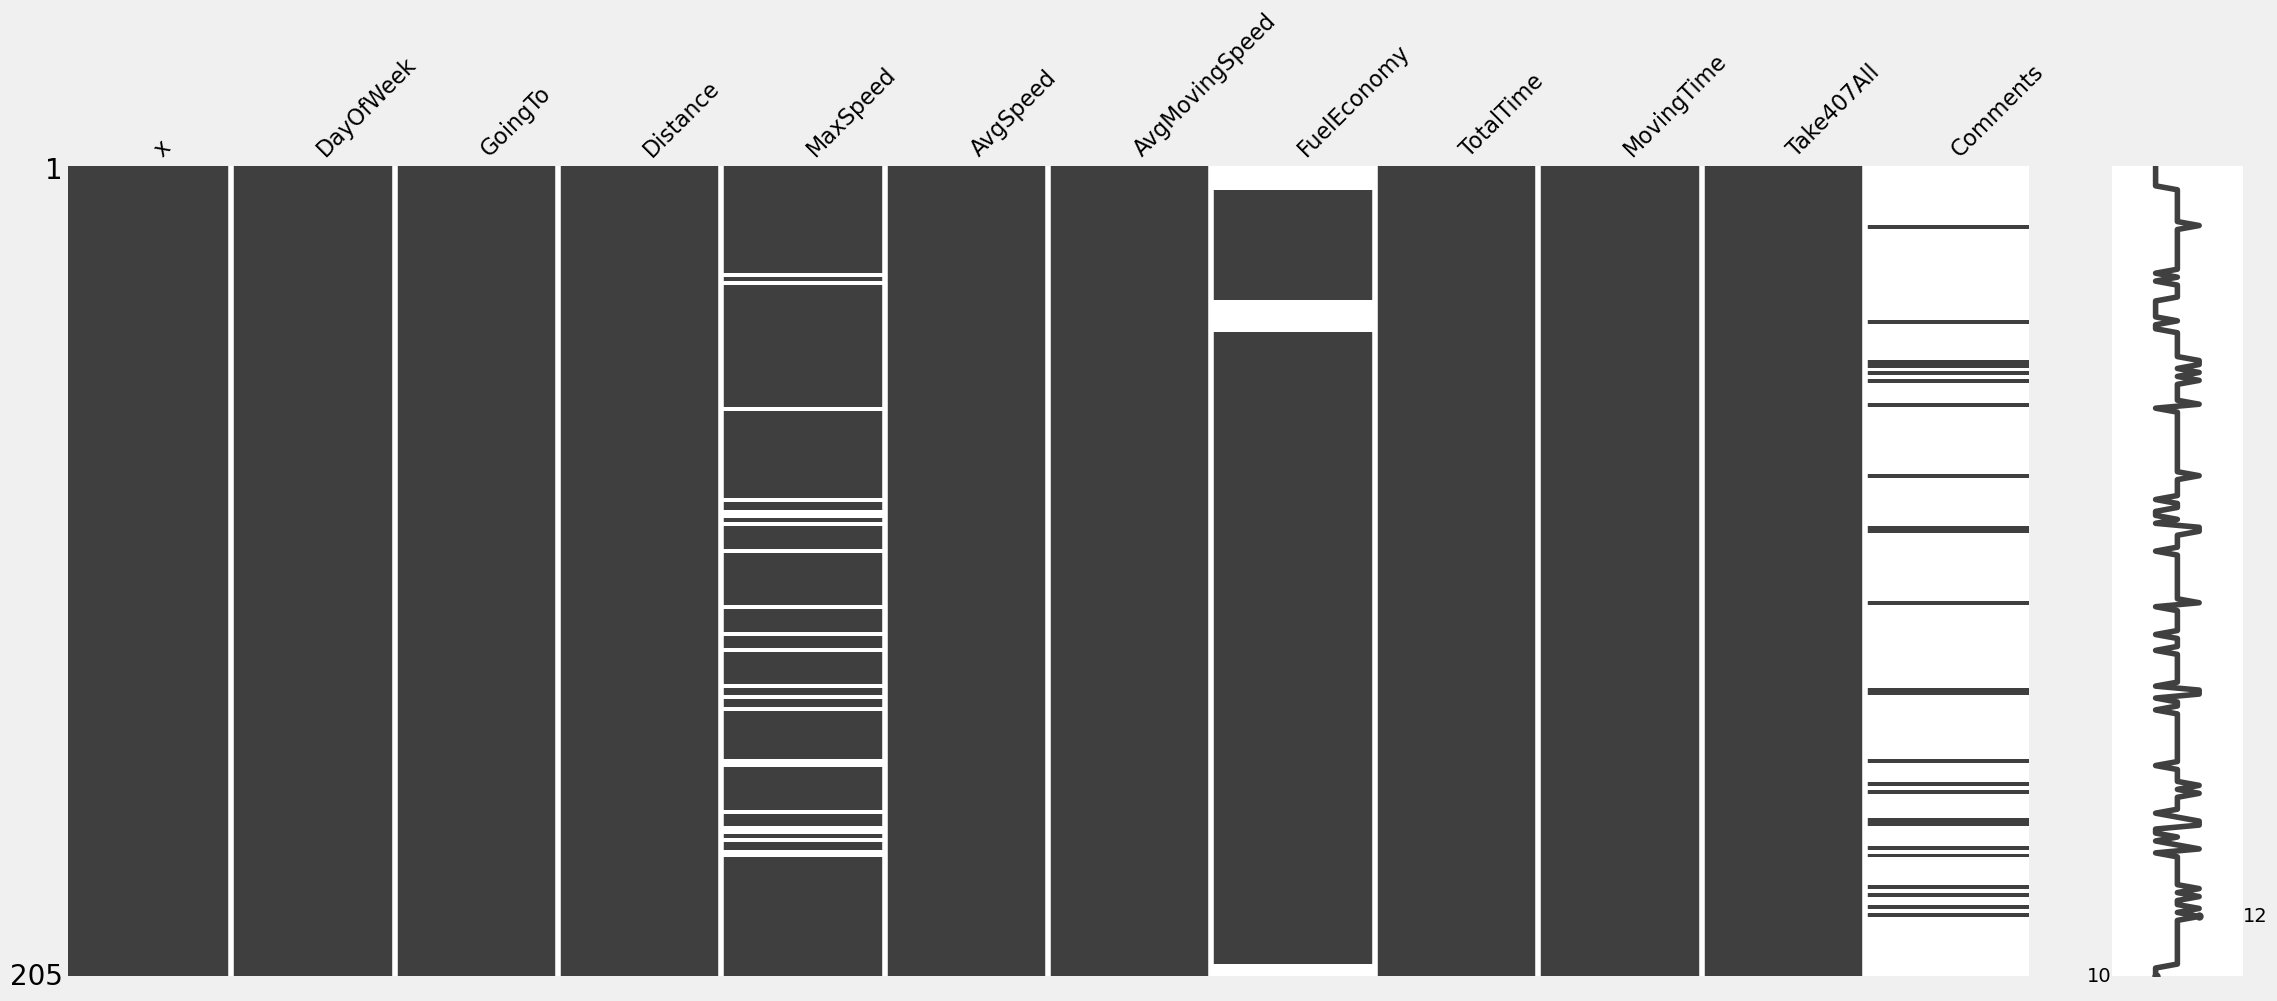

In [11]:
msno.matrix(df);


In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = df.filter(['Distance','MaxSpeed','AvgSpeed','AvgMovingSpeed'], axis=1).copy()

mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

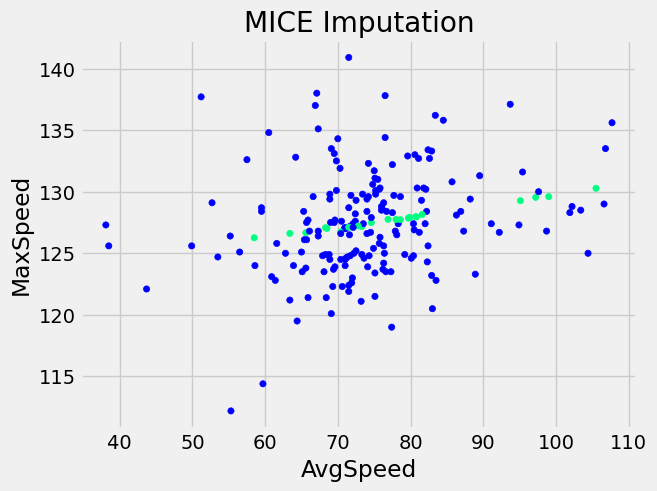

In [13]:
fig = plt.Figure()
null_values = df["MaxSpeed"].isnull() 
fig = df_mice_imputed.plot(x="AvgSpeed", y="MaxSpeed", kind="scatter", c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)
     